#  Phenotypic phase planes

In [1]:
#In this screipt we analyse the phenotype phase planes for all relevant conditions: aerobic and anaerobic.
import pandas as pd
import matplotlib.pyplot as plt
from cobra.io import read_sbml_model
from cobra.flux_analysis.phenotype_phase_plane import production_envelope
plt.style.use('ggplot')


In [24]:
# Verify working directory and change it if needed
# import os
# os.getcwd()
#os.chdir("DIR_PATH") #change accordingly

In [3]:
model = read_sbml_model("../data/models/yeast8_resv_glc.xml")

In [4]:
medium = model.medium

In [5]:
model.objective #check the model objective, since it is not biomass, we will change it to it.

In [6]:
#model.metabolites.biomass_c  #checking where the growth reaction is.
model.reactions.GROWTH

Reaction identifier,GROWTH
Name,growth
Memory address,0x1296e2530
Stoichiometry,biomass_c --> biomass -->
GPR,
Lower bound,0.0
Upper bound,1000.0


## Phenotype phase plane for res-yeast.xml model
### Focus on biomass

In [7]:
ppp_biomass = production_envelope( model,
    reactions = [model.reactions.EX_glc__D_e],
    objective = model.reactions.GROWTH)

In [31]:
ppp_biomass

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,EX_glc__D_e
0,EX_glc__D_e,0.040964,0.0,0.0,0.081928,0.0,0.0,-1.000000
1,EX_glc__D_e,0.040964,0.0,0.0,0.079772,0.0,0.0,-0.974644
2,EX_glc__D_e,0.040964,0.0,0.0,0.077616,0.0,0.0,-0.949288
3,EX_glc__D_e,0.040964,0.0,0.0,0.075460,0.0,0.0,-0.923932
4,EX_glc__D_e,0.040964,0.0,0.0,0.073304,0.0,0.0,-0.898576
5,EX_glc__D_e,0.040964,0.0,0.0,0.071148,0.0,0.0,-0.873220
6,EX_glc__D_e,0.040964,0.0,0.0,0.068992,0.0,0.0,-0.847864
7,EX_glc__D_e,0.040964,0.0,0.0,0.066836,0.0,0.0,-0.822508
8,EX_glc__D_e,0.040964,0.0,0.0,0.064680,0.0,0.0,-0.797152
9,EX_glc__D_e,0.040964,0.0,0.0,0.062524,0.0,0.0,-0.771796


<AxesSubplot: xlabel='Glucose uptake [mmol/g DW/h]', ylabel='Biomass objective [1/h]'>

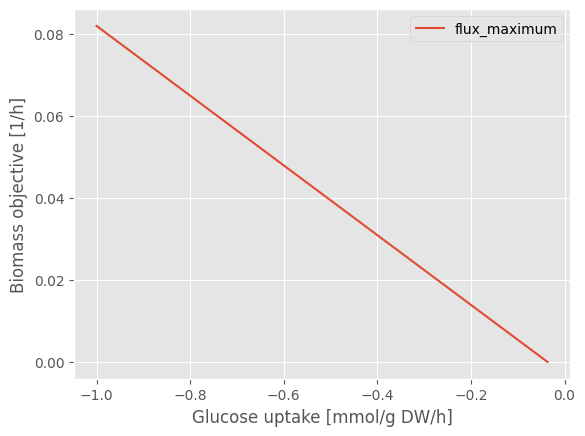

In [9]:
ppp_biomass.plot(x='EX_glc__D_e', y='flux_maximum', xlabel="Glucose uptake [mmol/g DW/h]", ylabel="Biomass objective [1/h]")


As we can see, the biomass decreases as the glucose uptake does. This behaviour is expected. Now lets increase glucose concentration.

#### Increase glucose concentration

In [33]:
print(model.reactions.EX_glc__D_e.bounds)

(-1.0, 1000.0)


In [10]:
medium = model.medium
with model: 
    medium['EX_glc__D_e'] = 4

    model.medium = medium 
    print(model.reactions.EX_glc__D_e.bounds) 

    ppp_biomass = production_envelope( model,
    reactions = [model.reactions.EX_glc__D_e],
    objective = model.reactions.GROWTH)


(-4, 1000.0)


<AxesSubplot: xlabel='Glucose uptake [mmol/g DW/h]', ylabel='Biomass objective [1/h]'>

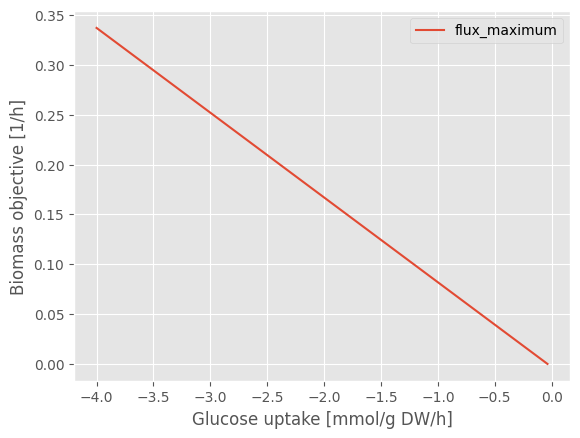

In [11]:
ppp_biomass.plot(x='EX_glc__D_e', y='flux_maximum', xlabel="Glucose uptake [mmol/g DW/h]", ylabel="Biomass objective [1/h]")


In [14]:
medium = model.medium
with model: 
    medium['EX_glc__D_e'] = 10

    model.medium = medium 
    print(model.reactions.EX_glc__D_e.bounds) 

    ppp_biomass = production_envelope( model,
    reactions = [model.reactions.EX_glc__D_e],
    objective = model.reactions.GROWTH)


(-10, 1000.0)


In [15]:
ppp_biomass

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,EX_glc__D_e
0,EX_glc__D_e,0.0,0.0,0.0,0.847193,0.0,0.0,-10.000000
1,EX_glc__D_e,0.0,0.0,0.0,0.802603,0.0,0.0,-9.475604
2,EX_glc__D_e,0.0,0.0,0.0,0.758014,0.0,0.0,-8.951208
3,EX_glc__D_e,0.0,0.0,0.0,0.713425,0.0,0.0,-8.426812
4,EX_glc__D_e,0.0,0.0,0.0,0.668836,0.0,0.0,-7.902415
5,EX_glc__D_e,0.0,0.0,0.0,0.624247,0.0,0.0,-7.378019
6,EX_glc__D_e,0.0,0.0,0.0,0.579658,0.0,0.0,-6.853623
7,EX_glc__D_e,0.0,0.0,0.0,0.535069,0.0,0.0,-6.329227
8,EX_glc__D_e,0.0,0.0,0.0,0.490480,0.0,0.0,-5.804831
9,EX_glc__D_e,0.0,0.0,0.0,0.445891,0.0,0.0,-5.280435


<AxesSubplot: xlabel='Glucose uptake [mmol/g DW/h]', ylabel='Biomass objective [1/h]'>

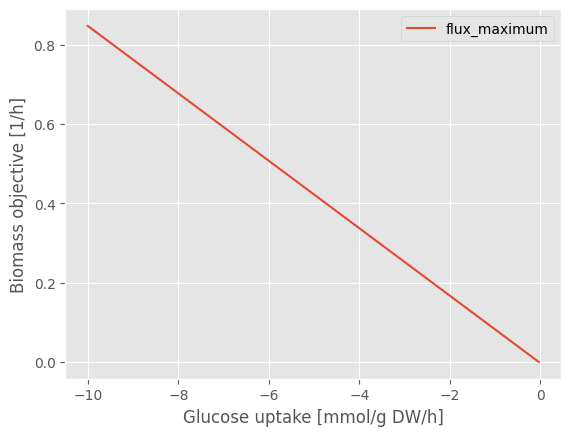

In [16]:
ppp_biomass.plot(x='EX_glc__D_e', y='flux_maximum', xlabel="Glucose uptake [mmol/g DW/h]", ylabel="Biomass objective [1/h]")


##### Determining the optimal O2 uptake rate

In [18]:
medium = model.medium
with model: 
    medium['EX_glc__D_e'] = 4

    model.medium = medium 
    print("Glucose bounss are", model.reactions.EX_glc__D_e.bounds) 


    ppp_o2 = production_envelope(model,
    reactions=[model.reactions.EX_o2_e],
    objective=model.reactions.GROWTH)
    print("O2 bounds are", model.reactions.EX_o2_e.bounds) 
                    

Glucose bounss are (-4, 1000.0)
O2 bounds are (-1000.0, 1000.0)


In [19]:
ppp_o2.EX_o2_e[ppp_o2.flux_maximum.idxmax()]

-8.842105263157856

<AxesSubplot: xlabel='Oxigen uptake [mmol/g DW/h]', ylabel='Biomass objective [1/h]'>

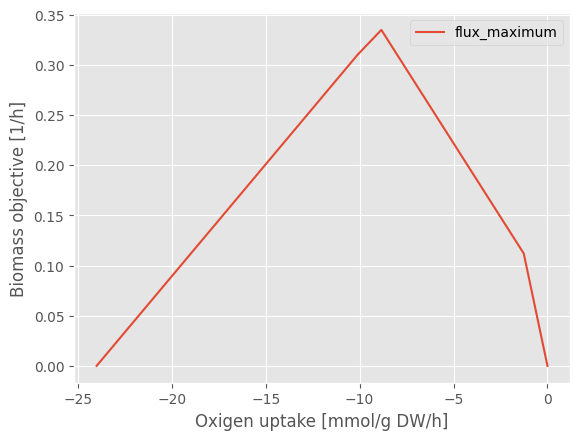

In [20]:
ppp_o2.plot(x='EX_o2_e', y='flux_maximum', xlabel="Oxigen uptake [mmol/g DW/h]", ylabel="Biomass objective [1/h]")

In [21]:
medium = model.medium
with model: 
    medium['EX_glc__D_e'] = 10

    model.medium = medium 
    print("Glucose bounss are", model.reactions.EX_glc__D_e.bounds) 


    ppp_o2 = production_envelope(model,
    reactions=[model.reactions.EX_o2_e],
    objective=model.reactions.GROWTH)
    print("O2 bounds are", model.reactions.EX_o2_e.bounds) 
                    

Glucose bounss are (-10, 1000.0)
O2 bounds are (-1000.0, 1000.0)


In [22]:
ppp_o2.EX_o2_e[ppp_o2.flux_maximum.idxmax()]

-22.105263157894733

<AxesSubplot: xlabel='Oxigen uptake [mmol/g DW/h]', ylabel='Biomass objective [1/h]'>

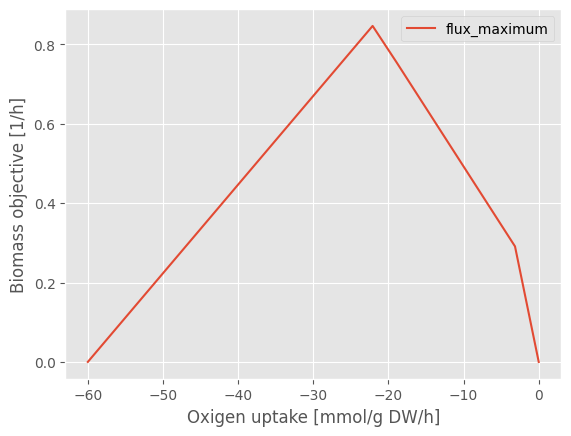

In [23]:
ppp_o2.plot(x='EX_o2_e', y='flux_maximum', xlabel="Oxigen uptake [mmol/g DW/h]", ylabel="Biomass objective [1/h]")

We can see that the maximum value corresponding to oxigen uptake is 21.452, passed this point, the biomass dicreasses.

In [24]:
with model:
    model.objective = model.reactions.GROWTH
    growth_rate = model.optimize().objective_value
    print("With O2 concentration", model.reactions.EX_o2_e.flux)
    print("Maximum growth rate is", growth_rate, "\n")
    

    medium['EX_o2_e'] = 4
    model.medium = medium

    model.objective = model.reactions.GROWTH
    growth_rate = model.optimize().objective_value
    print("With O2 concentration", model.reactions.EX_o2_e.flux)
    print("Maximum growth rate is", growth_rate, "\n")


    medium['EX_o2_e'] = 6
    model.medium = medium

    model.objective = model.reactions.GROWTH
    growth_rate = model.optimize().objective_value
    print("With O2 concentration", model.reactions.EX_o2_e.flux)
    print("Maximum growth rate is", growth_rate,"\n")

    medium['EX_o2_e'] = 8
    model.medium = medium

    model.objective = model.reactions.GROWTH
    growth_rate = model.optimize().objective_value
    print("With O2 concentration", model.reactions.EX_o2_e.flux)
    print("Maximum growth rate is", growth_rate,"\n")
    

With O2 concentration -2.3315329209467532
Maximum growth rate is 0.08192806489430624 

With O2 concentration -4.0
Maximum growth rate is 0.31579264464550727 

With O2 concentration -6.0
Maximum growth rate is 0.3746230718782252 

With O2 concentration -8.0
Maximum growth rate is 0.433453499110971 



In [26]:
medium = model.medium
with model: 
    medium['EX_glc__D_e'] = 4
    medium['EX_o2_e'] = 4

    model.medium = medium 
    print("Glucose bounss are", model.reactions.EX_glc__D_e.bounds) 


    ppp_o2 = production_envelope(model,
    reactions=[model.reactions.EX_o2_e],
    objective=model.reactions.GROWTH)
    print("O2 bounds are", model.reactions.EX_o2_e.bounds) 

Glucose bounss are (-4, 1000.0)
O2 bounds are (-4, 1000.0)


<AxesSubplot: xlabel='Oxigen uptake [mmol/g DW/h]', ylabel='Biomass objective [1/h]'>

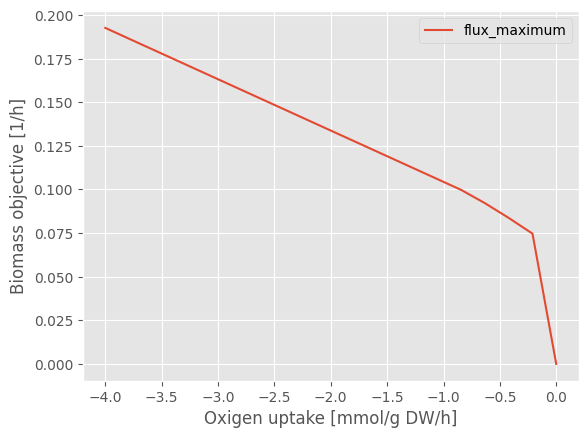

In [27]:
ppp_o2.plot(x='EX_o2_e', y='flux_maximum', xlabel="Oxigen uptake [mmol/g DW/h]", ylabel="Biomass objective [1/h]")

In [28]:
medium = model.medium
with model: 
    medium['EX_glc__D_e'] = 10
    medium['EX_o2_e'] = 4

    model.medium = medium 
    print("Glucose bounss are", model.reactions.EX_glc__D_e.bounds) 


    ppp_o2 = production_envelope(model,
    reactions=[model.reactions.EX_o2_e],
    objective=model.reactions.GROWTH)
    print("O2 bounds are", model.reactions.EX_o2_e.bounds) 
                    

Glucose bounss are (-10, 1000.0)
O2 bounds are (-4, 1000.0)


In [29]:
ppp_o2.EX_o2_e[ppp_o2.flux_maximum.idxmax()]

-4.0

<AxesSubplot: xlabel='Oxigen uptake [mmol/g DW/h]', ylabel='Biomass objective [1/h]'>

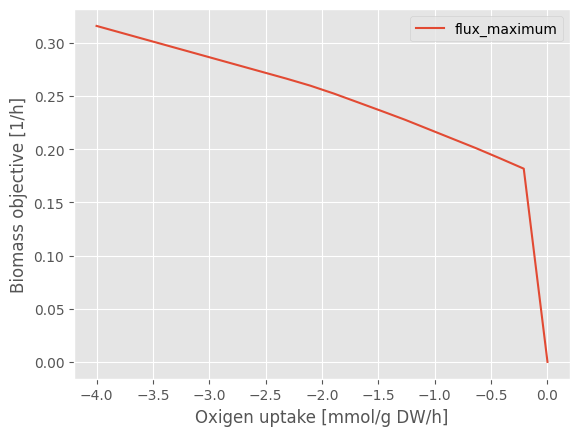

In [30]:
ppp_o2.plot(x='EX_o2_e', y='flux_maximum', xlabel="Oxigen uptake [mmol/g DW/h]", ylabel="Biomass objective [1/h]")
#plt.xlim([-5, 0])
#plt.ylim([0, 0.35])

### Now lets focus on resveratrol production.
Resveratrol flux vs. glucose uptake

In [31]:
medium = model.medium
with model: 
    medium['EX_glc__D_e'] = 10

    model.medium = medium 
    print("Glucose bounss are", model.reactions.EX_glc__D_e.bounds) 
    
    ppp_resveratrol = production_envelope(model,
    reactions=[model.reactions.EX_glc__D_e],
    objective=model.reactions.VVVST1)
    ppp_resveratrol

Glucose bounss are (-10, 1000.0)


<AxesSubplot: xlabel='Glucose uptake [mmol/g DW/h]', ylabel='Resveratrol objective [mmol/g DW/h]'>

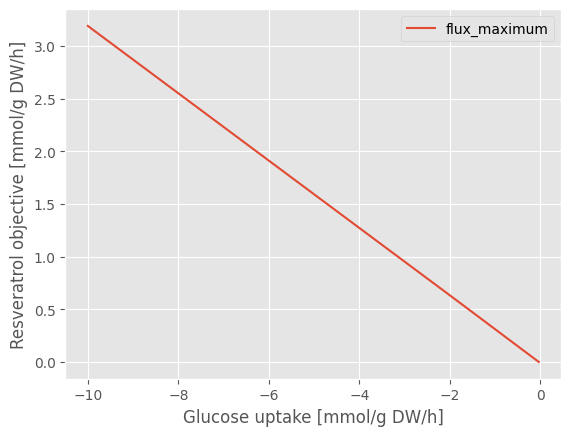

In [32]:
ppp_resveratrol.plot(x='EX_glc__D_e', y='flux_maximum', xlabel="Glucose uptake [mmol/g DW/h]", 
                         ylabel="Resveratrol objective [mmol/g DW/h]", grid=True)#.set_ylim(0, 3)

In [33]:
medium = model.medium
with model: 
    medium['EX_glc__D_e'] = 10

    model.medium = medium 
    print("Glucose bounss are", model.reactions.EX_glc__D_e.bounds) 
    
    ppp_resveratrol = production_envelope(model,
    reactions=[model.reactions.EX_glc__D_e],
    objective=model.reactions.VVVST1)
    ppp_resveratrol

Glucose bounss are (-10, 1000.0)


<AxesSubplot: xlabel='Glucose uptake [mmol/g DW/h]', ylabel='Resveratrol objective [mmol/g DW/h]'>

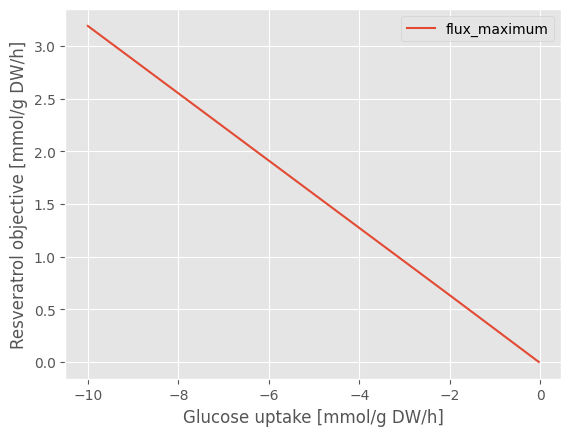

In [34]:
ppp_resveratrol.plot(x='EX_glc__D_e', y='flux_maximum', xlabel="Glucose uptake [mmol/g DW/h]", 
                         ylabel="Resveratrol objective [mmol/g DW/h]", grid=True)#.set_ylim(0, 3)

In [37]:
medium = model.medium
with model: 
    model.objective = model.reactions.VVVST1
    resv_production = model.optimize().objective_value
    print("With glucose concentration",(-1*model.reactions.EX_glc__D_e.flux))
    print("Maximum resveatrol productivity  [mmol gDW^-1 h^-1] = ",round(resv_production,3))
    print("Theoretical max. yield [mmol-glc / mmol-resv]:", round(resv_production / (-1*model.reactions.EX_glc__D_e.flux),3),  "\n")


    medium['EX_glc__D_e'] = 4
    medium['EX_o2_e'] = 4

    model.medium = medium 
    print("Glucose bounss are", model.reactions.EX_glc__D_e.bounds) 
    
    ppp_resveratrol = production_envelope(model,
    reactions=[model.reactions.EX_glc__D_e],
    objective=model.reactions.VVVST1)

    model.objective = model.reactions.VVVST1
    resv_production = model.optimize().objective_value
    print("With glucose concentration",(-1*model.reactions.EX_glc__D_e.flux, "and oxigen", (-1*model.reactions.EX_o2_e.flux)))
    print("Maximum resveatrol productivity  [mmol gDW^-1 h^-1] = ",round(resv_production,3))
    print("Theoretical max. yield [mmol-glc / mmol-resv]:", round(resv_production / (-1*model.reactions.EX_glc__D_e.flux),3),  "\n")

With glucose concentration 1.0
Maximum resveatrol productivity  [mmol gDW^-1 h^-1] =  0.31
Theoretical max. yield [mmol-glc / mmol-resv]: 0.31 

Glucose bounss are (-4, 1000.0)
With glucose concentration (4.0, 'and oxigen', 4.0)
Maximum resveatrol productivity  [mmol gDW^-1 h^-1] =  1.215
Theoretical max. yield [mmol-glc / mmol-resv]: 0.304 



<AxesSubplot: xlabel='Glucose uptake [mmol/g DW/h]', ylabel='Resveratrol objective [mmol/g DW/h]'>

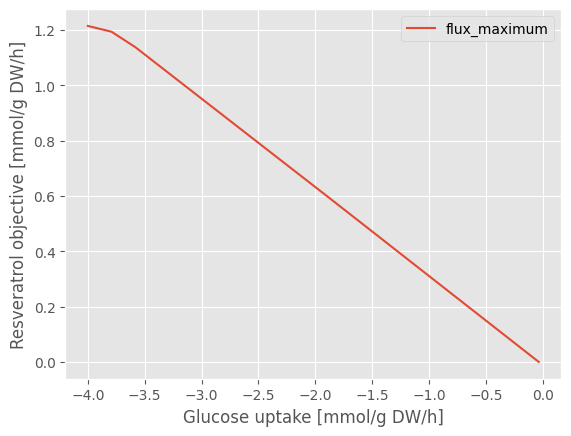

In [38]:
ppp_resveratrol.plot(x='EX_glc__D_e', y='flux_maximum', xlabel="Glucose uptake [mmol/g DW/h]", 
                         ylabel="Resveratrol objective [mmol/g DW/h]", grid=True)#.set_ylim(0, 3)

In [35]:
medium = model.medium
with model: 
    model.objective = model.reactions.VVVST1
    resv_production = model.optimize().objective_value
    print("With glucose concentration",(-1*model.reactions.EX_glc__D_e.flux))
    print("Maximum resveatrol productivity  [mmol gDW^-1 h^-1] = ",round(resv_production,3))
    print("Theoretical max. yield [mmol-glc / mmol-resv]:", round(resv_production / (-1*model.reactions.EX_glc__D_e.flux),3),  "\n")


    medium['EX_glc__D_e'] = 10
    medium['EX_o2_e'] = 4

    model.medium = medium 
    print("Glucose bounss are", model.reactions.EX_glc__D_e.bounds) 
    
    ppp_resveratrol = production_envelope(model,
    reactions=[model.reactions.EX_glc__D_e],
    objective=model.reactions.VVVST1)

    model.objective = model.reactions.VVVST1
    resv_production = model.optimize().objective_value
    print("With glucose concentration",(-1*model.reactions.EX_glc__D_e.flux, "and oxigen", (-1*model.reactions.EX_o2_e.flux)))
    print("Maximum resveatrol productivity  [mmol gDW^-1 h^-1] = ",round(resv_production,3))
    print("Theoretical max. yield [mmol-glc / mmol-resv]:", round(resv_production / (-1*model.reactions.EX_glc__D_e.flux),3),  "\n")

With glucose concentration 1.0
Maximum resveatrol productivity  [mmol gDW^-1 h^-1] =  0.31
Theoretical max. yield [mmol-glc / mmol-resv]: 0.31 

Glucose bounss are (-10, 1000.0)
With glucose concentration (10.0, 'and oxigen', 4.0)
Maximum resveatrol productivity  [mmol gDW^-1 h^-1] =  1.783
Theoretical max. yield [mmol-glc / mmol-resv]: 0.178 



As we can see, increasing the oxygen concentration leads to a higher maximum production of resveratrol, as well as a maximum theoretical yield.

<AxesSubplot: xlabel='Glucose uptake [mmol/g DW/h]', ylabel='Resveratrol objective [mmol/g DW/h]'>

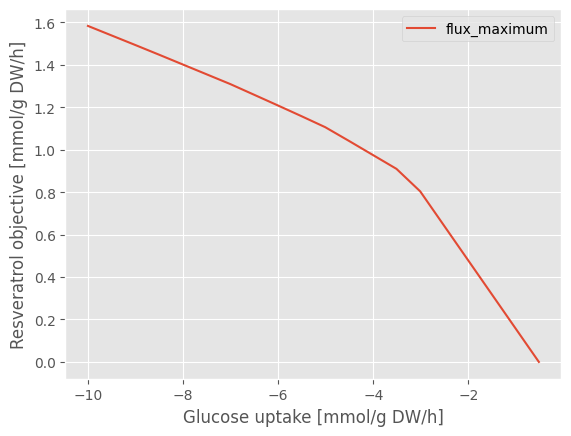

In [61]:
ppp_resveratrol.plot(x='EX_glc__D_e', y='flux_maximum', xlabel="Glucose uptake [mmol/g DW/h]", 
                         ylabel="Resveratrol objective [mmol/g DW/h]", grid=True)#.set_ylim(0, 3)